# Menentukan Berapa Banyak Client Yang Tertarik Untuk Membeli Kendaraan Atau Tidak

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load dataset train dan test dari local disk yang ada di folder Downloads

data_train = pd.read_csv("../Downloads/Tugas Orang/kendaraan_train.csv")
data_test = pd.read_csv("../Downloads/Tugas Orang/kendaraan_test.csv")

In [3]:
data_train.head(15)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
6,7,Wanita,33.0,1.0,8.0,0.0,NaN,Pernah,32435.0,124.0,215.0,1
7,8,Pria,23.0,NaN,28.0,1.0,< 1 Tahun,Tidak,26869.0,152.0,222.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0
9,10,NaN,54.0,1.0,29.0,0.0,> 2 Tahun,Pernah,88883.0,124.0,28.0,1


In [4]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## 1. Visualisasi Sebelum Preprocessing Untuk Data Train

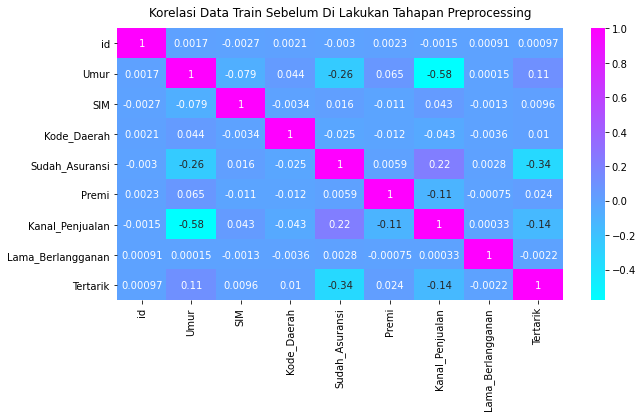

In [5]:
# Membuat visaulisasi sebelum data di lakukan tahapan preprocessing. Hal ini saya lakukan untuk melihat sebuah perbedaan antara
# nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing dan sesudah di preprocessing pada data train

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Kenapa hanya beberapa kolom saja yang terlihat nilai korelasinya, yakni hanya 9 kolom saja dari 12 kolom? Hal tersebut dikarenakan 3 kolom (yakni kolom "Jenis_Kelamin", "Umur_Kendaraan", dan "Kendaraan_Rusak") memiliki tipe string atau masih berupa kategorik. Sedangkan untuk melihat nilai korelasi dibutuhkan tipe data numerik, yaitu integer ataupun float.

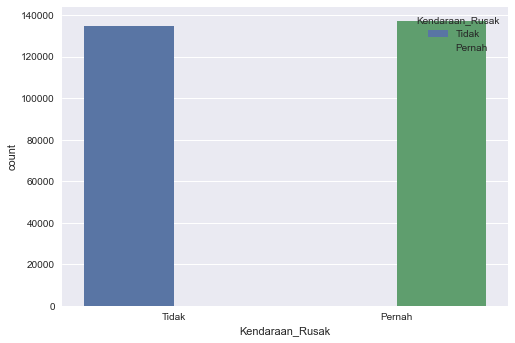

<Figure size 504x504 with 0 Axes>

In [6]:
# Melakukan visualisasi untuk kolom "Kendaraan_rusak" pada data train

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

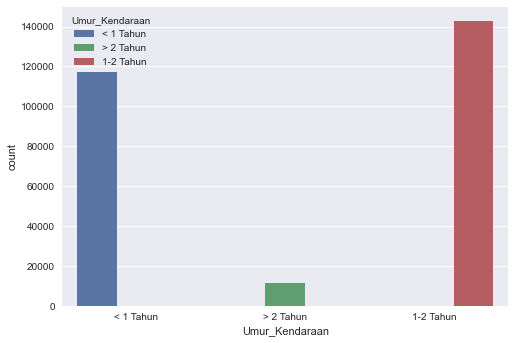

<Figure size 504x504 with 0 Axes>

In [7]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data train

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

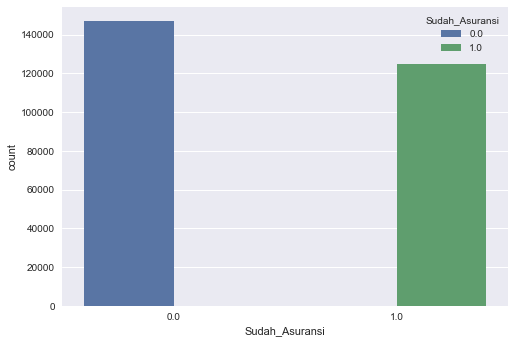

<Figure size 504x504 with 0 Axes>

In [8]:
# Melakukan visualisasi untuk kolom "Jenis_Kelamin" pada data train

plt.style.use("seaborn")
sns.countplot(x="Sudah_Asuransi", hue="Sudah_Asuransi", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

Setelah melakukan visualisasi sebelum nilai data yang ada di data_train dilakukan preprocessing, saya akan mengecek terlebih dahulu apakah di dalam data_train memiliki nilai data yang kosong/NaN atau sama sekali tidak mempunyainya.

In [9]:
# Mengecek apakah di dalam data train terdapat nilai data yang NaN atau tidak

data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Terlihat pada data train terdapat banyak sekali nilai data yang masih kosong. Maka langkah selanjutnya saya akan melakukan proses preprocessing untuk data train.

## 2. Preprocessing Data Train

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


Sebelum memasuki langkah preprocessing, saya akan memberi tahu bahwasanya ada beberapa tahapan yang saya lakukan di dalam preprocessing ini, diantaranya adalah:
1. Mengisi nilai yang kosong menjadi nilai data yang sudah ditentukan agar tidak terjadi bias. Semisal nilai kosong yang terdapat di dalam kolom "Umur_Kendaraan" akan saya isi menjadi nilai "> 2 Tahun". Dan Kolom "Kendaraan_Rusak" akan saya isi nilai kosongnya menjadi "Tidak".
2. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.
3. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.
4. Karena pada data train masih banyak sekali terdapat nilai yang kosong/NaN, sisanya akan saya isi dengan nilai rata-rata yang dimiliki oleh masing-masing kolom.

In [11]:
# Mulai mengganti nilai NaN pada kolom "Umur_Kendaraan" menjadi nilai yaitu "> 2 Tahun"
data_train["Umur_Kendaraan"] = data_train["Umur_Kendaraan"].fillna("> 2 Tahun")

# Mulai mengganti nilai NaN pada kolom "Kendaraan_Rusak" menjadi nilai yaitu "Tidak"
data_train["Kendaraan_Rusak"] = data_train["Kendaraan_Rusak"].fillna("Tidak")

data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


In [12]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_train = data_train.drop(["id", "Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Kanal_Penjualan"], axis = 1)
data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.0,1.0,< 1 Tahun,Tidak,97.0,0
1,48.0,0.0,> 2 Tahun,Pernah,158.0,0
2,21.0,1.0,< 1 Tahun,Tidak,119.0,0
3,58.0,0.0,1-2 Tahun,Tidak,63.0,0
4,50.0,0.0,> 2 Tahun,Tidak,194.0,0


In [13]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_train["Sudah_Asuransi"] = le.fit_transform(data_train["Sudah_Asuransi"])
data_train["Umur_Kendaraan"] = le.fit_transform(data_train["Umur_Kendaraan"])
data_train["Kendaraan_Rusak"] = le.fit_transform(data_train["Kendaraan_Rusak"])

data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.0,1,1,1,97.0,0
1,48.0,0,2,0,158.0,0
2,21.0,1,1,1,119.0,0
3,58.0,0,0,1,63.0,0
4,50.0,0,2,1,194.0,0


In [14]:
# Melihat data desktriptif dari setiap kolom yang ada di data train

data_train.describe()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
count,271617.000000,285831.000000,285831.000000,285831.000000,271839.000000,285831.000000
mean,38.844336,0.535502,0.590426,0.520265,154.286302,0.122471
std,15.522487,0.590172,0.649304,0.499590,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,82.000000,0.000000
50%,36.000000,0.000000,1.000000,1.000000,154.000000,0.000000
75%,49.000000,1.000000,1.000000,1.000000,227.000000,0.000000
max,85.000000,2.000000,2.000000,1.000000,299.000000,1.000000


In [15]:
# Karena kolom "Umur" masih memiliki nilai NaN, maka saya akan mengganti/mengisinya nilai NaN menjadi nilai Mean

mean = data_train.mean()
data_train = data_train.replace(np.nan, mean)
data_train.head(15)

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,30.000000,1,1,1,97.0,0
1,48.000000,0,2,0,158.0,0
2,21.000000,1,1,1,119.0,0
3,58.000000,0,0,1,63.0,0
4,50.000000,0,2,1,194.0,0
5,21.000000,1,1,1,171.0,0
6,33.000000,0,2,0,215.0,1
7,23.000000,1,1,1,222.0,0
8,20.000000,1,1,1,31.0,0
9,54.000000,0,2,0,28.0,1


Dapat dilihat bahwasanya nilai NaN sudah tidak ada karena sudah diisi atau digantikan dengan nilai mean yang ada di dalam setiap kolom. Sebagai contoh pada kolom "Umur" memiliki nilai rata-rata yaitu 38.844336. Maka dari itu jika dilihat pada nilai indeks ke-11, yang sebelumnya memiliki nilai NaN atau tidak ada nilai, kini telah terisi oleh nilai 38.844336 karena di dalam script yang saya gunakan, saya mengisinya dengan nilai mean atau nilai rata-rata yang dimiliki oleh masing-masing kolom, sehingga karena kolom "Umur" memiliki nilai rata-rata yaitu 38.844336, maka nilai kosong yang ada (NaN) akan terisi menjadi 38.844336.

In [16]:
# Mengecek kembali apakah masih terdapat nilai yang masih kosong atau tidak di dalam data train

data_train.isnull().sum()

Umur                 0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Dapat dilihat bahwasanya nilai NaN sudah tidak ada karena sudah diisi atau digantikan dengan nilai mean yang ada di dalam setiap kolom. Maka selanjutnya saya akan membuat visualisasi kembali dari beberapa kolom setelah dilakukan tahapan preprocessing.

## 3. Visualisasi Setelah Preprocessing Pada Data Train

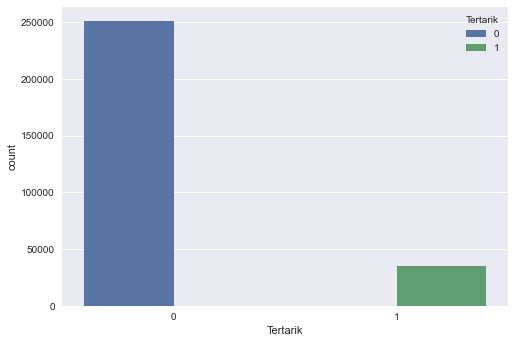

<Figure size 504x504 with 0 Axes>

In [17]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

plt.style.use("seaborn")
sns.countplot(x="Tertarik", hue="Tertarik", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

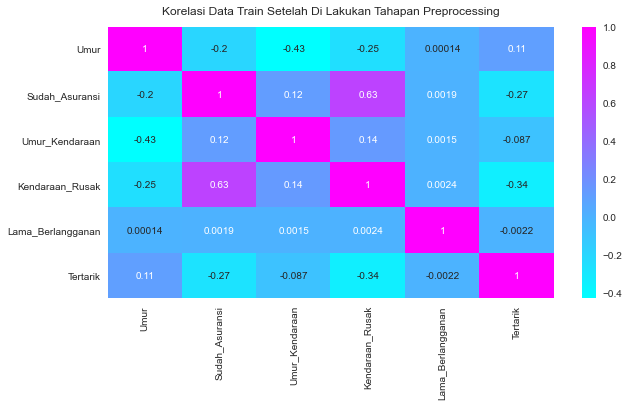

In [18]:
# Membuat visualisasi untuk menampilkan nilai korelasi agar dapat melihat perbedaan visualisasi antara sebelum di preprocessing
# dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

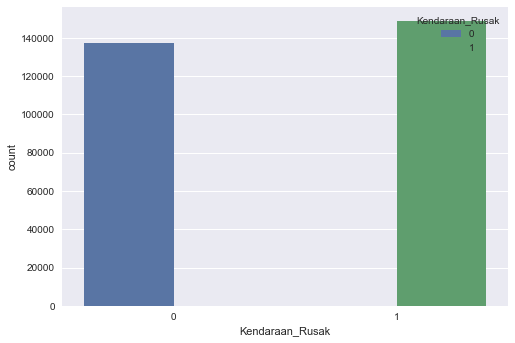

<Figure size 504x504 with 0 Axes>

In [19]:
# Melakukan visualisasi untuk kolom "Kendaraan_Rusak" pada data train

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

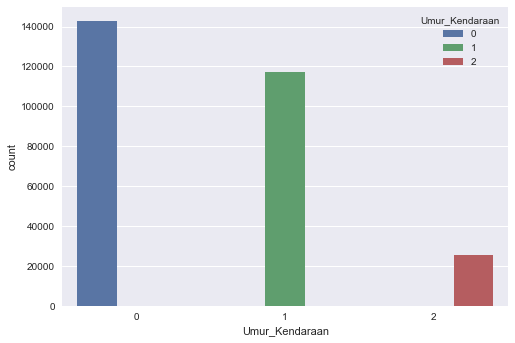

<Figure size 504x504 with 0 Axes>

In [20]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data train

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

## 4. Preprocessing + Visualisasi Pada Data Test

In [21]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [22]:
# Mengecek apakah di dalam data test terdapat data yang kosong (yang ditandai dengan NaN) atau tidak

data_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

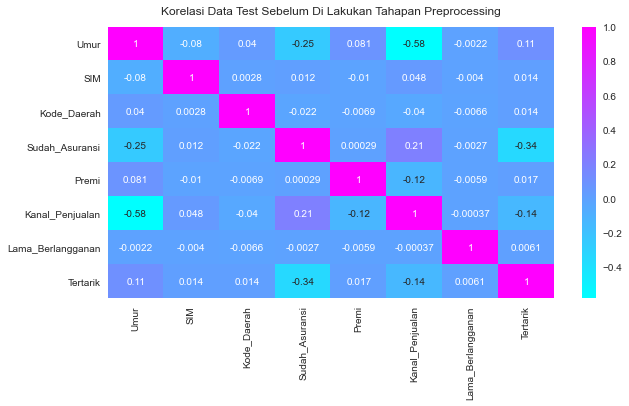

In [23]:
# Membuat visaulisasi sebelum data di lakukan tahapan preprocessing. Hal ini saya lakukan untuk melihat sebuah perbedaan antara
# nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing dan sesudah di preprocessing pada data test

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Sebelum memasuki langkah preprocessing, saya akan menjelaskan beberapa tahapan yang saya lakukan di dalam preprocessing ini, diantaranya adalah:
1. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.
2. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.

In [24]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_test["Jenis_Kelamin"] = le.fit_transform(data_test["Jenis_Kelamin"])
data_test["Umur_Kendaraan"] = le.fit_transform(data_test["Umur_Kendaraan"])
data_test["Kendaraan_Rusak"] = le.fit_transform(data_test["Kendaraan_Rusak"])

data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0


In [25]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_test = data_test.drop(["Jenis_Kelamin", "SIM", "Kode_Daerah", "Premi", "Kanal_Penjualan"], axis = 1)
data_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,49,0,0,0,145,0
1,22,1,1,1,241,0
2,24,1,1,1,62,0
3,46,1,0,1,34,0
4,35,0,0,0,229,0


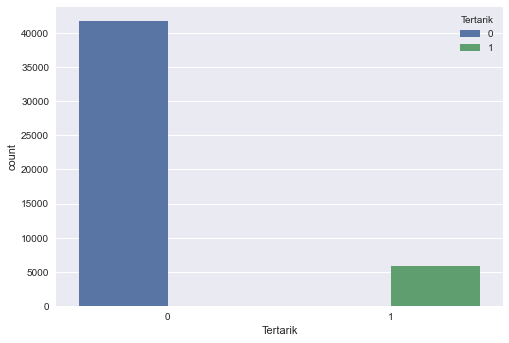

<Figure size 504x504 with 0 Axes>

In [26]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" dengan nilai hue yaitu kolom "Kendaraan_Rusak" pada data test

plt.style.use("seaborn")
sns.countplot(x="Tertarik", hue="Tertarik", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

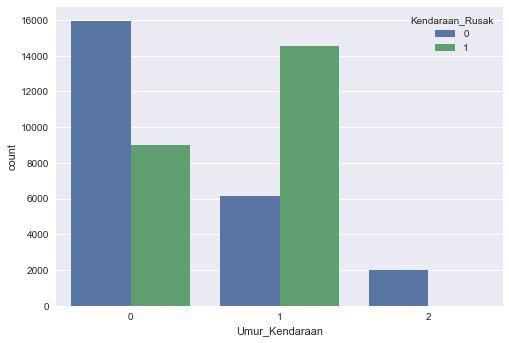

<Figure size 504x504 with 0 Axes>

In [27]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" dengan nilai hue yaitu kolom "Kendaraan_Rusak" pada data test

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Kendaraan_Rusak", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

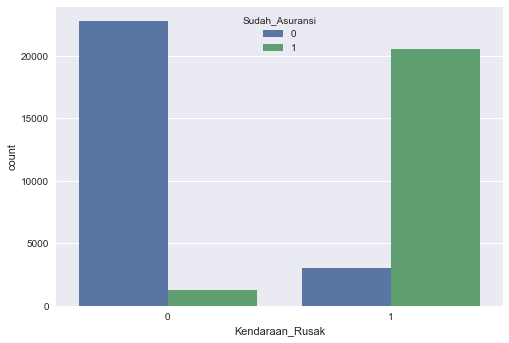

<Figure size 504x504 with 0 Axes>

In [28]:
# Melakukan visualisasi untuk kolom "Umur" dengan nilai hue yaitu kolom "Sudah_Asuransi" pada data test

plt.style.use("seaborn")
sns.countplot(x="Kendaraan_Rusak", hue="Sudah_Asuransi", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

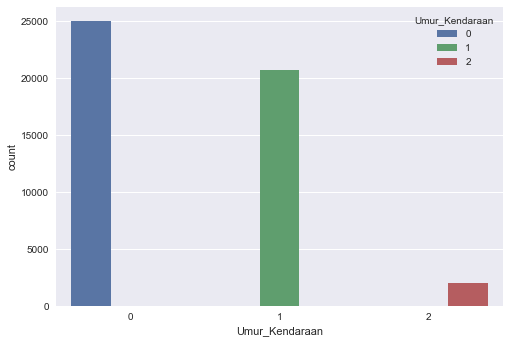

<Figure size 504x504 with 0 Axes>

In [29]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data test

plt.style.use("seaborn")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

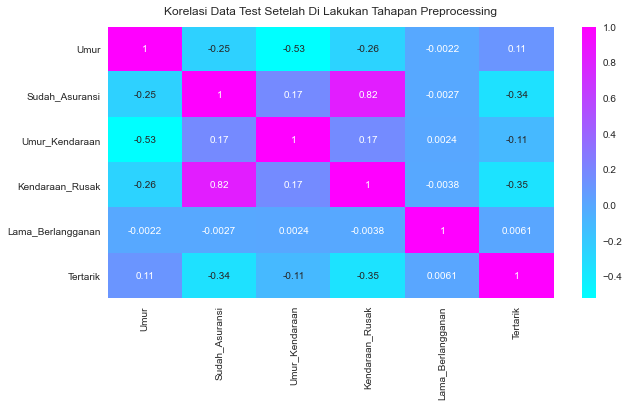

In [30]:
# Membuat visualisasi untuk menampilkan nilai korelasi dari data test agar dapat melihat perbedaan visualisasi 
# antara sebelum di preprocessing dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

## 5. Pemodelan Dengan Decision Tree Menggunakan Data Test.csv

In [31]:
data_test.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Lama_Berlangganan,Tertarik
0,49,0,0,0,145,0
1,22,1,1,1,241,0
2,24,1,1,1,62,0
3,46,1,0,1,34,0
4,35,0,0,0,229,0


In [32]:
# Pemisahan data menjadi 2 variable

x = data_test.drop(["Tertarik"], axis=1)
y = data_test["Tertarik"]

In [33]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari variabel test mencapai 20% sehingga untuk ukuran variabel trainnya adalah 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [34]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [35]:
# Pemaggilan model decision tree terhadap variabel training yang ada di data test.csv

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = decisiontree.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = decisiontree.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [37]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
7706 662 884 276
------------------Performa Variabel Train------------------------
33187 223 1868 2833


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 7709.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 659.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 882.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 278.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 33187.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 223.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 1868.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 2833.

In [38]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree pada dataset Test.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8368
           1       0.29      0.24      0.26      1160

    accuracy                           0.84      9528
   macro avg       0.60      0.58      0.59      9528
weighted avg       0.82      0.84      0.83      9528

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     33410
           1       0.93      0.60      0.73      4701

    accuracy                           0.95     38111
   macro avg       0.94      0.80      0.85     38111
weighted avg       0.94      0.95      0.94     38111



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [39]:
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_train)
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_test)

Jumlah Prediksi Pada Variabel Train Adalah : [0 0 0 ... 0 0 0]
Jumlah Prediksi Pada Variabel Test Adalah : [0 0 0 ... 0 0 0]


In [40]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_test

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


In [41]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train})
output_train.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


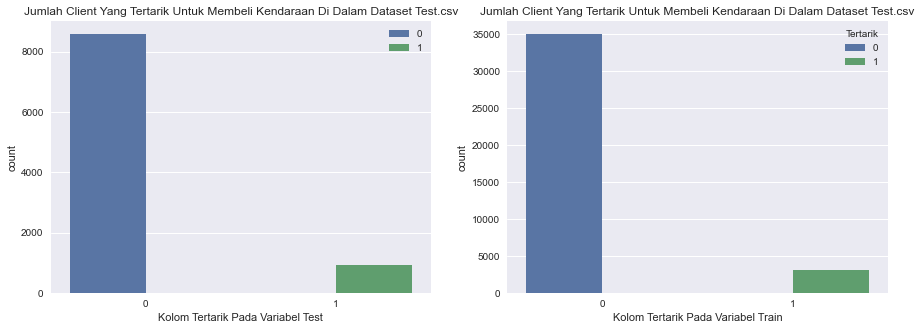

In [42]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan/tidak di dalam data test.csv
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik

## 6. Pemodelan Dengan Decision Tree Menggunakan Data Train.csv

In [43]:
# Pemisahan data menjadi 2 variable

x = data_train.drop(["Tertarik"], axis=1)
y = data_train["Tertarik"]

In [44]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari variabel test mencapai 20% sehingga untuk ukuran variabel trainnya adalah 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [45]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [46]:
# Pemaggilan model decision tree terhadap variabel training

decisiontree =  DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = decisiontree.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = decisiontree.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [48]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
tp, tn, fp, fn = confusion_matrix(y_test, y_pred_test).ravel()
print(tp, tn, fp, fn)

print("------------------Performa Variabel Train------------------------")
tp, tn, fp, fn = confusion_matrix(y_train, y_pred_train).ravel()
print(tp, tn, fp, fn)

------------------Performa Variabel Test------------------------
47802 2371 6095 899
------------------Performa Variabel Train------------------------
198433 2219 18613 9399


Ket:
- Variabel test
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 47798.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 2375.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 6093.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 901.

- Variabel train
1. Di dalam TP (True positive), jumlah data positif yang berhasil di klasifikasikan dengan benar (data positif) berjumlah 198433.
2. Di dalam TN (True negative), jumlah data negatif yang berhasil di klasifikasikan dengan salah (data negatif) berjumlah 2219.
3. Di dalam FP (False positive), jumlah data negatif namun di klasifikasikan dengan benar (data negatif) berjumlah 18613.
4. Di dalam FN (False negative), jumlah data positif namun di klasifikasikan dengan salah (data positif) berjumlah 9399.

In [49]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree pada dataset Train.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     50173
           1       0.27      0.13      0.18      6994

    accuracy                           0.85     57167
   macro avg       0.58      0.54      0.55     57167
weighted avg       0.81      0.85      0.83     57167

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.95    200652
           1       0.81      0.34      0.47     28012

    accuracy                           0.91    228664
   macro avg       0.86      0.66      0.71    228664
weighted avg       0.90      0.91      0.89    228664



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [50]:
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_test)
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_train)

Jumlah Prediksi Pada Variabel Test Adalah : [0 0 0 ... 0 0 0]
Jumlah Prediksi Pada Variabel Train Adalah : [0 0 0 ... 0 0 0]


In [51]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_train

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


In [52]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train})
output_train.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


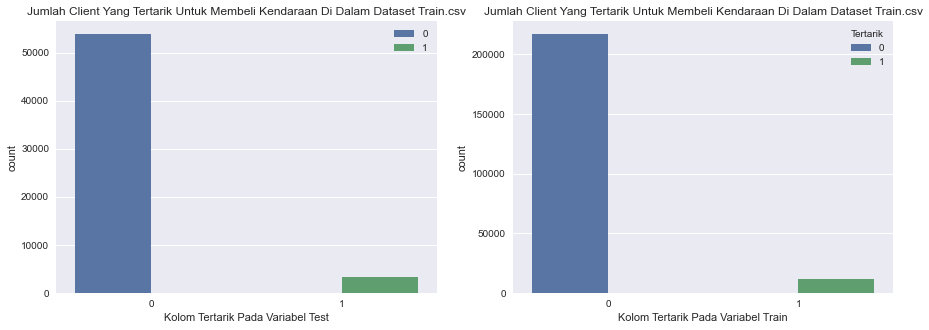

In [53]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan atau tidak
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik